# 1. Data Analysis of the Influencers:
# 2. Sentiment Analysis of the Influencers: 


In [1]:
# Import the Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import time
from datetime import datetime, timezone
# import seaborn as sns
from os import path, makedirs # fetch path and makedirs function from os file
import csv # fetch csv file
from glob import glob # fetching glob function only from the glob lib

In [2]:
# Import keys from the config file
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# # Twitter API Keys
# consumer_key = 'Your Key'
# consumer_secret = 'Your Key'
# access_token = 'Your Key'
# access_token_secret = 'Your Key'

In [4]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
# Load and read csv file containing the details of the Influencers 
influencer_data_load = "RawData/SentimentInfluencerInputData.csv"
influencer_data_read = pd.read_csv(influencer_data_load)

In [7]:
# for index, row in Influencers_DF.iterrows():
Data_Influencers_DF = influencer_data_read
Not_Found = 0

#SS - define variable for holding tweets for influencer

all_tweet_listing = []

print("-----------Start extraction!!!-----------")

for index, row in Data_Influencers_DF.iterrows():
    target_user = row["Twitter_Handle"]
    Genre =  row["Genre"]
    
    try:
        
        #SS - retrieve top 200 tweets for influencer
        
        public_tweets = api.user_timeline(target_user, count=200, result_type="recent")

        #SS - write to all_tweet_listing

        for tweet in public_tweets:
            
            Date = datetime.strptime(tweet['created_at'],'%a %b %d %H:%M:%S %z %Y').strftime('%m/%d/%Y')

            all_tweet_listing.append({"Influencer":target_user,
                               "Date": Date,
                               "Genre":Genre,
                               "Tweet":tweet["text"]})
    
        user_account = api.get_user(target_user)
        
        user_geo_enabled = user_account["geo_enabled"]
        
        if (user_geo_enabled == True):
            Data_Influencers_DF.at[index, "Loc"] = user_account["location"]
        else:
            Data_Influencers_DF.at[index, "Loc"] = 'NA'

        if (user_account["lang"] == 'en'):
            Data_Influencers_DF.at[index, "Lang"] = 'Eng'
        else:
            Data_Influencers_DF.at[index, "Lang"] = 'NA'
        
        Data_Influencers_DF.at[index, "Created On"] = datetime.strptime(user_account['created_at'],'%a %b %d %H:%M:%S %z %Y').strftime('%m/%d/%Y')
        
        Data_Influencers_DF.at[index, "Age Of Account"] = (datetime.now(timezone.utc) - datetime.strptime(user_account['created_at'],'%a %b %d %H:%M:%S %z %Y')).days
        
        
       #  Data_Influencers_DF.at[index, "Real Name"] = user_real_name
        Data_Influencers_DF.at[index, "Tweets"] = user_account["statuses_count"]
        Data_Influencers_DF.at[index, "Followers"] = user_account["followers_count"]
        Data_Influencers_DF.at[index, "Following"] = user_account["friends_count"]
        Data_Influencers_DF.at[index, "Favorites Count"] = user_account["favourites_count"]
        
              
    
    except tweepy.TweepError as e:
        Not_Found = Not_Found + 1
        print(f"exception for {row['Twitter_Handle']}: {e}")

print("----------- Extraction Complete !!!-----------")        
print(Not_Found)

-----------Start extraction!!!-----------
exception for @ilanusglazer: Not authorized.
exception for @billieelish: Not authorized.
----------- Extraction Complete !!!-----------
2


In [8]:
#SS -translate dict to a dataframe
tweet_listing_pd = pd.DataFrame.from_dict(all_tweet_listing)

In [9]:
#SS -stats for tweet listing for influencers. PLEASE DON'T REMOVE. Required to quantify digital footprint!
tweet_listing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68505 entries, 0 to 68504
Data columns (total 4 columns):
Date          68505 non-null object
Genre         68505 non-null object
Influencer    68505 non-null object
Tweet         68505 non-null object
dtypes: object(4)
memory usage: 2.1+ MB


In [10]:
#SS -top 1000 key words from Influencer tweets

Top_1000 = pd.Series(' '.join(tweet_listing_pd['Tweet']).lower().split()).value_counts()[:1000]

In [11]:
Top_1000.to_csv("RawData/Top_1000_keywords.csv", index=True, header=True)

In [12]:
#SS - Write to CSV for analysis
tweet_listing_pd.to_csv("RawData/TweetListings.csv", index=False, header=True)

In [13]:
# #SS - define target tags for social and entertainment

# social_target_tags = ["#FamiliesBelongTogetherMarch","#gun","gun","shooting","gun-control","election","#metoo","metoo","FamiliesBelongTogetherMarch","PrideMonth","#PrideMonth","FamiliesBelongTogether","ChildreninCages","UniteTheFamilies","WeCare"]

# entertainment_target_tags = ["#SocialMediaDay","SocialMediaDay","WorldCup","#WorldCup","#fifa","fifa", "#worldcup2018russia","#PostASongLyricYouLove"]

# #SS - define lists to hold tweets based on tags

# social_tweet_list_dict = []

# entertainment_tweet_list_dict = []

# for index, row in tweet_listing_pd.iterrows():
    
#     tweet_listing_filtered = [tweet_listing_pd[tweet_listing_pd['Tweet'].str.contains(x)] for x in target_tags]
    
#     for tweet_list in tweet_listing_filtered:
#         Date = tweet_list["Date"]
#         Genre = tweet_list["Genre"]
#         Influencer = tweet_list["Influencer"]
#         Tweet = tweet_list["Tweet"]
#         tweet_list_dict.append({
#             "Data" : Data,
#             "Genre":Genre,
#             "Influencer": Influencer,
#             "Tweet" : Tweet
#         })

In [14]:
# Remove missing values.
Data_Influencers_DF.dropna()

,Twitter_Handle,First_Name,Last_Name,Genre,Loc,Lang,Created On,Age Of Account,Tweets,Followers,Following,Favorites Count
0,@_AnneHathaway,Anne,Hathaway,Actors,NA,Eng,09/13/2012,2118.0,2.0,282.0,0.0,0.0
1,@IAMannalynnemcc,AnnaLynne,McCord,Actors,NA,Eng,01/16/2010,3089.0,5776.0,228658.0,502.0,2157.0
2,@EmmaWatson,Emma,Watson,Actors,NA,Eng,07/14/2010,2910.0,1642.0,29141153.0,382.0,991.0
3,@JuliaRoberts,Julia,Roberts,Actors,NA,Eng,01/13/2011,2727.0,0.0,544655.0,0.0,0.0
4,@LeoDiCaprio,Leonardo,DiCaprio,Actors,NA,Eng,04/16/2010,2999.0,1284.0,19326731.0,145.0,40.0
5,@EvaLongoria,Eva,Baston,Actors,"Los Angeles, CA",Eng,02/02/2010,3072.0,15805.0,7691923.0,809.0,151.0
6,@TheRock,Dwayne,Johnson,Actors,NA,Eng,02/11/2011,2698.0,21651.0,13042981.0,242.0,142.0
7,@jessicaalba,Jessica,Alba,Actors,NA,Eng,11/24/2009,3142.0,6244.0,9649293.0,1359.0,1442.0
8,@EllenPompeo,Ellen,Pompeo,Actors,NY/LA,Eng,03/23/2013,1928.0,5211.0,1551687.0,541.0,6060.0
9,@JessicaCapshaw,Jessica,Capshaw,Actors,NA,Eng,05/05/2011,2615.0,4017.0,935913.0,348.0,86.0


In [15]:
# Grouped on Genre 
Data_Influencers_DF['Average Tweets'] = Data_Influencers_DF['Tweets']
AggregatedGenre= Data_Influencers_DF.groupby(["Genre"]).agg({'Genre': 'count', 'Tweets': 'sum', 'Followers': 'sum','Average Tweets':'mean','Age Of Account':'mean'})
AggregatedGenre
AggregatedGenre.sort_values(['Followers'], ascending=False)


,Genre,Tweets,Followers,Average Tweets,Age Of Account
Genre,,,,,
Musicians,45,455031.0,919292244.0,10341.613636,3017.795455
Sports_celeb,118,896593.0,512048935.0,7598.245763,2794.322034
Politicians,73,575024.0,247579228.0,7877.041096,2821.082192
Comedians,44,481318.0,210166767.0,11193.441860,3141.976744
Actors,42,387946.0,103376361.0,9236.809524,2690.523810
Social_workers,14,350878.0,11881737.0,25062.714286,2874.214286
Economists,26,579641.0,2194700.0,22293.884615,2851.384615


In [16]:
# Sorting on Average Tweets and grouped on Genere
AggregatedGenre.sort_values(['Average Tweets'],ascending=False)

,Genre,Tweets,Followers,Average Tweets,Age Of Account
Genre,,,,,
Social_workers,14,350878.0,11881737.0,25062.714286,2874.214286
Economists,26,579641.0,2194700.0,22293.884615,2851.384615
Comedians,44,481318.0,210166767.0,11193.441860,3141.976744
Musicians,45,455031.0,919292244.0,10341.613636,3017.795455
Actors,42,387946.0,103376361.0,9236.809524,2690.523810
Politicians,73,575024.0,247579228.0,7877.041096,2821.082192
Sports_celeb,118,896593.0,512048935.0,7598.245763,2794.322034


In [17]:
# People who are top ten Influencer who tweet more
top_ten_twitters = Data_Influencers_DF.sort_values(['Tweets'],ascending=False).head(10)
top_ten_twitters

,Twitter_Handle,First_Name,Last_Name,Genre,Loc,Lang,Created On,Age Of Account,Tweets,Followers,Following,Favorites Count,Average Tweets
332,@Noahpinion,Noah,Smith,Economists,NA,Eng,04/14/2011,2636.0,140868.0,102327.0,810.0,211742.0,140868.0
359,@BDUTT,Barkha,Dutt,Social_workers,India,Eng,02/02/2009,3437.0,118522.0,6818231.0,1573.0,27895.0,118522.0
356,@ProfessorChic,Jamie,Mitchell,Social_workers,NA,Eng,04/04/2011,2646.0,79770.0,1455.0,572.0,24906.0,79770.0
339,@haroldpollack,Harold,Pollack,Economists,NA,Eng,12/25/2009,3111.0,65226.0,20535.0,2426.0,7087.0,65226.0
276,@CoryBooker,Cory,Booker,Politicians,"Newark, NJ",Eng,08/11/2008,3612.0,61946.0,4121606.0,93083.0,91.0,61946.0
325,@MarkThoma,Mark,Thoma,Economists,NA,Eng,10/18/2008,3545.0,60106.0,44685.0,417.0,5.0,60106.0
82,@iliza,Iliza,Shiesinger,Comedians,"Hollywood, CA",Eng,02/15/2009,3424.0,49170.0,170280.0,468.0,27101.0,49170.0
125,@IGGYAZALEA,Iggy,Azalea,Musicians,"California, USA",Eng,06/09/2010,2945.0,47711.0,8083808.0,6509.0,4225.0,47711.0
216,@criscyborg,Cris,Cyborg,Sports_celeb,cris.cyborg.llc@gmail.com,Eng,11/29/2009,3137.0,46474.0,191721.0,2134.0,12424.0,46474.0
352,@socworkpodcast,Jonathan,Singer,Social_workers,"Chicago, IL",Eng,09/09/2009,3218.0,45416.0,14244.0,793.0,22408.0,45416.0


In [18]:
# Top ten Influencer who who have more Followers
top_ten_influencer = Data_Influencers_DF.sort_values(['Followers'],ascending=False).head(10)
top_ten_influencer

,Twitter_Handle,First_Name,Last_Name,Genre,Loc,Lang,Created On,Age Of Account,Tweets,Followers,Following,Favorites Count,Average Tweets
91,@katyperry,Katy,Perry,Musicians,,Eng,02/20/2009,3419.0,9219.0,109573029.0,216.0,6214.0,9219.0
251,@BarackObama,Barack,Obama,Politicians,NA,Eng,03/05/2007,4137.0,15517.0,103455383.0,621129.0,11.0,15517.0
86,@taylorswift13,Taylor,Swift,Musicians,NA,Eng,12/06/2008,3495.0,100.0,85538639.0,0.0,458.0,100.0
95,@ladygaga,Lady,Gaga,Musicians,NA,Eng,03/26/2008,3750.0,8764.0,78894508.0,127020.0,1915.0,8764.0
66,@TheEllenShow,Ellen,DeGeneres,Comedians,California,Eng,08/14/2008,3609.0,16965.0,78050437.0,35732.0,954.0,16965.0
139,@Cristiano,Cristiano,Ronaldo,Sports_celeb,Madrid,NA,06/14/2010,2940.0,3212.0,74208323.0,99.0,0.0,3212.0
105,@jtimberlake,Justin,Timberlake,Musicians,"Memphis, TN",Eng,03/25/2009,3386.0,3975.0,66044944.0,282.0,192.0,3975.0
107,@BritneySpears,Britney,Spears,Musicians,NA,Eng,09/22/2008,3570.0,5474.0,58235620.0,386045.0,2554.0,5474.0
87,@ArianaGrande,Ariana,Grande,Musicians,ǝʌɐ uooɯʎǝuoɥ,Eng,04/23/2009,3358.0,41436.0,57670470.0,64056.0,34198.0,41436.0
122,@ddlovato,Demi,Lovato,Musicians,DALLAS/LA,Eng,02/17/2009,3422.0,17084.0,57275180.0,539.0,2098.0,17084.0


In [19]:
# Still Working test cell
# to find the handle of followers of the top most 
# active Influencer so that we can send the tweet through a bot.
# top_ten_twitters.head(1)['Twitter_Handle'].map(lambda x: x.lstrip('@'))
# import time
# ids = []
# for page in tweepy.Cursor(api.followers_ids, top_ten_twitters.head(1)['Twitter_Handle'].map(lambda x: x.lstrip('@'))).pages():
#     ids.extend(page)
#     time.sleep(60)

# 2. Sentiment Analysis of the Influencers: 

In [20]:
###
# Influencers = influencer_data_read
# s = Influencers.iloc[:,0]


# Scatter Plot for Sentimental Analysis of Top 5 Influences last 100 tweets  

In [21]:
# IB People who are top 5 Influencer, with the greatest number of followers
top_5_influencer = Data_Influencers_DF.sort_values(['Followers'],ascending=False).head(5)
top_5_influencer

,Twitter_Handle,First_Name,Last_Name,Genre,Loc,Lang,Created On,Age Of Account,Tweets,Followers,Following,Favorites Count,Average Tweets
91,@katyperry,Katy,Perry,Musicians,,Eng,02/20/2009,3419.0,9219.0,109573029.0,216.0,6214.0,9219.0
251,@BarackObama,Barack,Obama,Politicians,NA,Eng,03/05/2007,4137.0,15517.0,103455383.0,621129.0,11.0,15517.0
86,@taylorswift13,Taylor,Swift,Musicians,NA,Eng,12/06/2008,3495.0,100.0,85538639.0,0.0,458.0,100.0
95,@ladygaga,Lady,Gaga,Musicians,NA,Eng,03/26/2008,3750.0,8764.0,78894508.0,127020.0,1915.0,8764.0
66,@TheEllenShow,Ellen,DeGeneres,Comedians,California,Eng,08/14/2008,3609.0,16965.0,78050437.0,35732.0,954.0,16965.0


In [22]:
#IB Working Module --  Extract the first 100 tweets of the top ten Influencers

# Extract the first 100 tweets of the Influencers
print("-----------Start extraction of the tweets posted by the Influencers!!!-----------")
Influencers = []
Influencers = top_5_influencer["Twitter_Handle"]
Influencers

# IB Influencer's overall sentiments
Influencers_overall_results = []

Sentiment_array_infl = []

# IB loop through each top ten influencer
for user in Influencers:
    
   # IB Variables for holding compound sentiments
    compound_list = []
    
    # IB Variable for max_id
    oldest_tweet = None
    
    # Set the tweet count to 100
    tweet_count = 0
    print("Extracting tweets from %s"%user)
    
    # Extract tweets up to 5 pages
    for x in range(5):
        ### IB - it is working - print(f"For page number: '{x}' ")
        influencer_tweets = api.user_timeline(user,page = x,  max_id = oldest_tweet )       
        
        # For each tweet in a bunch of public tweets
        for tweet in influencer_tweets:
            
            #Calculate the compound, positive, negative and neutral values of each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Save the Tweets in an array as a dictionery item 
            Sentiment_array_infl.append({"Influencers" : user,
                                    "Tweet Text" : tweet["text"],
                                    "Compound" : compound,
                                    "Positive" : pos,
                                    "Negative" : neg,
                                    "Neutral" : neu,
                                    "Date" : tweet["created_at"],
                                    "Tweets Ago" : tweet_count
                                   })
            
            # IB Collect compund sentiments for each Infuencer
            compound_list.append(compound)
            
            #Decrease count of tweet by 1 in the reverse order
            tweet_count += 1
            
        # IB get Tweet ID, subtract 1,assign to oldest_tweet
        oldest_tweet = tweet["id"] - 1
        
    # IB List for dictionary of results for _overall_ sentiments for each user
    Influencers_overall_results.append({"Influencer": user, "Overall Sentiment": np.mean(compound_list)})

print("-----------End of Extraction of Tweets !!!-----------")
###Influencers_overall_results

-----------Start extraction of the tweets posted by the Influencers!!!-----------
Extracting tweets from @katyperry
Extracting tweets from @BarackObama
Extracting tweets from @taylorswift13
Extracting tweets from @ladygaga
Extracting tweets from @TheEllenShow
-----------End of Extraction of Tweets !!!-----------


In [23]:
# IB Prepare Results Dataframe for the scatter plot
Influencers_overall_results_df = pd.DataFrame.from_dict(Sentiment_array_infl)
Influencers_overall_results_df.head(10) 

,Compound,Date,Influencers,Negative,Neutral,Positive,Tweet Text,Tweets Ago
0,0.8805,Sat Jun 23 01:18:28 +0000 2018,@katyperry,0.000,0.638,0.362,Was so proud to give the gift of #transcendent...,0
1,0.0000,Fri Jun 22 19:27:57 +0000 2018,@katyperry,0.000,1.000,0.000,found my first skin tag today. I think I’m an ...,1
2,0.1695,Thu Jun 21 02:10:52 +0000 2018,@katyperry,0.000,0.750,0.250,"Never forget, everyone was once a child.",2
3,0.0000,Wed Jun 20 21:10:37 +0000 2018,@katyperry,0.000,1.000,0.000,My Aussies 🐨 &amp; Kiwis 🥝! For the FINALE of ...,3
4,0.0000,Fri Jun 15 19:50:07 +0000 2018,@katyperry,0.000,1.000,0.000,"I 👁 you, @RoarForJess, and I ❤ you, and I’m si...",4
5,0.0000,Sat Jun 09 23:51:56 +0000 2018,@katyperry,0.000,1.000,0.000,Scandinavians have figured it out.,5
6,0.0000,Sat Jun 09 14:02:29 +0000 2018,@katyperry,0.000,1.000,0.000,Oi oi @JackGarratt remember when we locked our...,6
7,0.0000,Sat Jun 09 04:08:27 +0000 2018,@katyperry,0.000,1.000,0.000,WITNESS IS 1⃣❗🎂 🎈 https://t.co/fz83TjrJUr http...,7
8,0.0000,Wed Jun 06 17:11:41 +0000 2018,@katyperry,0.000,1.000,0.000,IM SCREAMINGOSBEJRMF$&amp;2@!K https://t.co/Sn...,8
9,-0.8821,Tue Jun 05 03:08:49 +0000 2018,@katyperry,0.445,0.483,0.072,CALIFORNIANS! What’s important to you? Is it g...,9


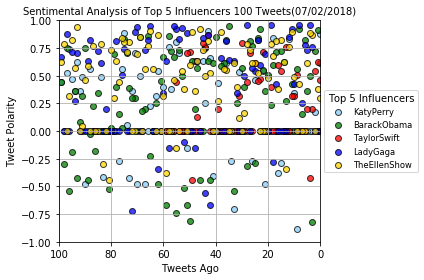

In [24]:
# IB Creating Sentiment Analysis for Top Ten Influences (07/02/2018) Scatter Plot

# Separate media_user_results_df Dataset into 5 parts/ datasets by "Media Source"
inf1_tweet_data_df = Influencers_overall_results_df[Influencers_overall_results_df['Influencers'] == "@katyperry"] 
inf2_tweet_data_df = Influencers_overall_results_df[Influencers_overall_results_df['Influencers'] == "@BarackObama"] 
# For each of media sources following the first one in the media dataset reset index to 0-99
# in order to plot in the common area
inf2_tweet_data_df = inf2_tweet_data_df.reset_index(drop=True)
inf3_tweet_data_df = Influencers_overall_results_df[Influencers_overall_results_df['Influencers'] == "@taylorswift13"] 
inf3_tweet_data_df = inf3_tweet_data_df.reset_index(drop=True)
inf4_tweet_data_df = Influencers_overall_results_df[Influencers_overall_results_df['Influencers'] == "@ladygaga"] 
inf4_tweet_data_df = inf4_tweet_data_df.reset_index(drop=True)
inf5_tweet_data_df = Influencers_overall_results_df[Influencers_overall_results_df['Influencers'] == "@TheEllenShow"] 
inf5_tweet_data_df = inf5_tweet_data_df.reset_index(drop=True)

# Get the values for each part of the scatter plot by "Influencers"
# INF1
# Get values for X axis
inf1_tweet_ago_data = inf1_tweet_data_df.index
# Get values for Y axis
inf1_tweet_polarity_data = inf1_tweet_data_df["Compound"] 
####################################################################
# INF2
# Get values for X axis
inf2_tweet_ago_data = inf2_tweet_data_df.index 
# Get values for Y axis
inf2_tweet_polarity_data = inf2_tweet_data_df["Compound"] 
####################################################################
# INF3
# Get values for X axis
inf3_tweet_ago_data = inf3_tweet_data_df.index
# Get values for Y axis
inf3_tweet_polarity_data = inf3_tweet_data_df["Compound"] 
####################################################################
# INF4
# Get values for X axis
inf4_tweet_ago_data = inf4_tweet_data_df.index
# Get values for Y axis
inf4_tweet_polarity_data = inf4_tweet_data_df["Compound"] 
####################################################################
# INF5
# Get values for X axis
inf5_tweet_ago_data = inf5_tweet_data_df.index
# Get values for Y axis
inf5_tweet_polarity_data = inf5_tweet_data_df["Compound"] 
####################################################################

# Organize the layout for the scatter plot
plt.title("Sentimental Analysis of Top 5 Influencers 100 Tweets(07/03/2018)", Fontsize= 10 )
# Labels for the scatter plot circles for each Influencer
labels = ["KatyPerry" "BarackObama" "TaylorSwift" "LadyGaga" "TheEllenShow"]
# Colors for the scatter plot circles for each Influencer
colors = ["lightskyblue","green","red", "blue", "gold"]

# Define X and Y of the scatter plot
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# Define X and Y limits
plt.xlim(100, 0)
plt.ylim( -1.0, 1.0 )

# Writing data to the same Scatter Plot 5 times, for each Influencer 
#           ("KatyPerry" "BarackObama" "TaylorSwift" "LadyGaga" "TheEllenShow")
plt.scatter( inf1_tweet_ago_data, inf1_tweet_polarity_data, c="lightskyblue", edgecolor="black", 
            linewidths=1, alpha =0.75, marker='o', label="KatyPerry")
plt.scatter( inf2_tweet_ago_data, inf2_tweet_polarity_data, c="green", edgecolor="black", \
            linewidths=1, alpha=0.75, marker='o', label="BarackObama")
plt.scatter( inf3_tweet_ago_data, inf3_tweet_polarity_data, c="red", edgecolor="black", 
            linewidths=1, alpha=0.75, marker='o', label="TaylorSwift")
plt.scatter( inf4_tweet_ago_data, inf4_tweet_polarity_data, c="blue", edgecolor="black", 
            linewidths=1, alpha=0.75, marker='o', label="LadyGaga")
plt.scatter( inf5_tweet_ago_data, inf5_tweet_polarity_data, c="gold", edgecolor="black", 
            linewidths=1, alpha=0.75, marker='o', label="TheEllenShow")
 
# Create the legend of the Scatter plot
legend = plt.legend(fontsize="small", loc="center left", title="Top 5 Influencers", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.grid(True)

# Save the figure with the Scatter Plot
plt.savefig("OutPut/InfluencersSentimentsTweeterPolarityScatterPlot.png")

# Show the Scatter Plot
plt.show()

# Scatter Plot for Sentimental Analysis of Top 5 Twitters last 100 tweets

In [25]:
# IB Top 5 People who who have more Followers
top_5_twitters = Data_Influencers_DF.sort_values(['Tweets'],ascending=False).head(5)
top_5_twitters

,Twitter_Handle,First_Name,Last_Name,Genre,Loc,Lang,Created On,Age Of Account,Tweets,Followers,Following,Favorites Count,Average Tweets
332,@Noahpinion,Noah,Smith,Economists,NA,Eng,04/14/2011,2636.0,140868.0,102327.0,810.0,211742.0,140868.0
359,@BDUTT,Barkha,Dutt,Social_workers,India,Eng,02/02/2009,3437.0,118522.0,6818231.0,1573.0,27895.0,118522.0
356,@ProfessorChic,Jamie,Mitchell,Social_workers,NA,Eng,04/04/2011,2646.0,79770.0,1455.0,572.0,24906.0,79770.0
339,@haroldpollack,Harold,Pollack,Economists,NA,Eng,12/25/2009,3111.0,65226.0,20535.0,2426.0,7087.0,65226.0
276,@CoryBooker,Cory,Booker,Politicians,"Newark, NJ",Eng,08/11/2008,3612.0,61946.0,4121606.0,93083.0,91.0,61946.0


In [26]:
#IB Working Module --  Extract the first 100 tweets of the top Twitters

# # Extract the first 100 tweets of the Influencers
print("-----------Start extraction of the tweets posted by the Influencers!!!-----------")
Twitters = []
Twitters = top_5_twitters["Twitter_Handle"]
Twitters

# IB Twitters's overall sentiments
Twitters_overall_results = []

Sentiment_array_tw = []

# IB loop through each top ten twitter
for user in Twitters:
    
    ###print(f"For Twitter: '{user}' ")
    # IB Variables for holding compound sentiments
    compound_list_tw = []
    
    # IB Variable for max_id
    oldest_tweet = None
    
    # Set the tweet count to 100
    tweet_count = 0
    print("Extracting tweets from %s"%user)
    
    # Extract tweets up to 5 pages
    for x in range(5):
        
        ### IB - it is working - print(f"For page number: '{x}' ")
        twitters_tweets = api.user_timeline(user,page = x,  max_id = oldest_tweet )       
        
        # For each tweet in a bunch of public tweets
        for tweet in twitters_tweets:
            
            #Calculate the compound, positive, negative and neutral values of each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Save the Tweets in an array as a dictionery item 
            Sentiment_array_tw.append({"Twitter" : user,
                                    "Tweet Text" : tweet["text"],
                                    "Compound" : compound,
                                    "Positive" : pos,
                                    "Negative" : neg,
                                    "Neutral" : neu,
                                    "Date" : tweet["created_at"],
                                    "Tweets Ago" : tweet_count
                                   })
            
            # IB Collect compund sentiments for each Infuencer
            compound_list_tw.append(compound)
            
            #Decrease count of tweet by 1 in the reverse order
            tweet_count += 1
            
        # IB get Tweet ID, subtract 1,assign to oldest_tweet
        oldest_tweet = tweet["id"] - 1
        
    # IB List for dictionary of results for _overall_ sentiments for each user
    Twitters_overall_results.append({"Twitter": user, "Overall Sentiment": np.mean(compound_list_tw)})

print("-----------End of Extraction of Tweets !!!-----------")
###Twitters_overall_results

-----------Start extraction of the tweets posted by the Influencers!!!-----------
Extracting tweets from @Noahpinion
Extracting tweets from @BDUTT
Extracting tweets from @ProfessorChic
Extracting tweets from @haroldpollack
Extracting tweets from @CoryBooker
-----------End of Extraction of Tweets !!!-----------


In [27]:
# IB Prepare Results Dataframe for the scatter plot
Twitters_overall_results_df = pd.DataFrame.from_dict(Sentiment_array_tw)
Twitters_overall_results_df.head(10) 

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,Twitter
0,-0.4215,Tue Jul 03 03:39:33 +0000 2018,0.135,0.865,0.000,"@MichaelFoster26 I mean, blatant lies on your ...",0,@Noahpinion
1,-0.3300,Tue Jul 03 03:38:02 +0000 2018,0.229,0.642,0.128,@Cooporatist I'm glad you wrote this reply so ...,1,@Noahpinion
2,0.0000,Tue Jul 03 03:34:56 +0000 2018,0.000,1.000,0.000,@MichaelFoster26 Why are you such an intention...,2,@Noahpinion
3,0.8588,Tue Jul 03 03:32:57 +0000 2018,0.000,0.596,0.404,@Whoda_Ida It would be a good thing to know. B...,3,@Noahpinion
4,-0.2617,Tue Jul 03 03:31:21 +0000 2018,0.108,0.892,0.000,"@dgonzalez1 @NinjaEconomics I've seen income, ...",4,@Noahpinion
5,-0.6792,Tue Jul 03 03:30:40 +0000 2018,0.247,0.753,0.000,Japan: *dramatically increases immigration*\n\...,5,@Noahpinion
6,-0.3291,Tue Jul 03 03:26:38 +0000 2018,0.207,0.793,0.000,@Whoda_Ida But they're screwing themselves ove...,6,@Noahpinion
7,-0.0258,Tue Jul 03 03:22:21 +0000 2018,0.181,0.645,0.174,@dgonzalez1 @NinjaEconomics I do wish this Pew...,7,@Noahpinion
8,0.3182,Tue Jul 03 03:20:17 +0000 2018,0.000,0.813,0.187,"@dgonzalez1 @NinjaEconomics Coming from Texas,...",8,@Noahpinion
9,-0.7430,Tue Jul 03 03:19:17 +0000 2018,0.240,0.760,0.000,RT @yonatanzunger: Content warning: torture of...,9,@Noahpinion


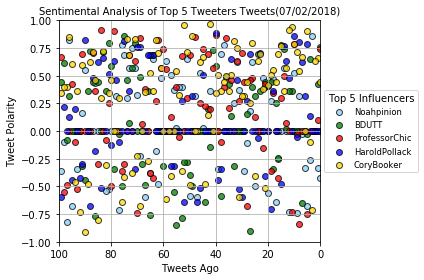

In [28]:
# IB Creating Sentiment Analysis for Top Ten Influences Scatter Plot

# Separate media_user_results_df Dataset into 5 parts/ datasets by "Media Source"
tw1_tweet_data_df = Twitters_overall_results_df[Twitters_overall_results_df['Twitter'] == "@Noahpinion"] 
tw2_tweet_data_df = Twitters_overall_results_df[Twitters_overall_results_df['Twitter'] == "@BDUTT"] 
# For each of media sources following the first one in the media dataset reset index to 0-99
# in order to plot in the common area
tw2_tweet_data_df = tw2_tweet_data_df.reset_index(drop=True)
tw3_tweet_data_df = Twitters_overall_results_df[Twitters_overall_results_df['Twitter'] == "@ProfessorChic"] 
tw3_tweet_data_df = tw3_tweet_data_df.reset_index(drop=True)
tw4_tweet_data_df = Twitters_overall_results_df[Twitters_overall_results_df['Twitter'] == "@haroldpollack"] 
tw4_tweet_data_df = tw4_tweet_data_df.reset_index(drop=True)
tw5_tweet_data_df = Twitters_overall_results_df[Twitters_overall_results_df['Twitter'] == "@CoryBooker"] 
tw5_tweet_data_df = tw5_tweet_data_df.reset_index(drop=True)

# Get the values for each part of the scatter plot by "Twitter"
# TW1
# Get values for X axis
tw1_tweet_ago_data = tw1_tweet_data_df.index
# Get values for Y axis
tw1_tweet_polarity_data = tw1_tweet_data_df["Compound"] 
####################################################################
# TW2
# Get values for X axis
tw2_tweet_ago_data = tw2_tweet_data_df.index 
# Get values for Y axis
tw2_tweet_polarity_data = tw2_tweet_data_df["Compound"] 
####################################################################
# TW3
# Get values for X axis
tw3_tweet_ago_data = tw3_tweet_data_df.index
# Get values for Y axis
tw3_tweet_polarity_data = tw3_tweet_data_df["Compound"] 
####################################################################
# TW4
# Get values for X axis
tw4_tweet_ago_data = tw4_tweet_data_df.index
# Get values for Y axis
tw4_tweet_polarity_data = tw4_tweet_data_df["Compound"] 
####################################################################
# TW5
# Get values for X axis
tw5_tweet_ago_data = tw5_tweet_data_df.index
# Get values for Y axis
tw5_tweet_polarity_data = tw5_tweet_data_df["Compound"] 
###################################################################

# Organize the layout for the scatter plot
plt.title("Sentimental Analysis of Top 5 Tweeters Tweets(07/03/2018)", Fontsize= 10 )

# Labels for the scatter plot circles for each Twitter
labels = ["Noahpinion" "BDUTT" "ProfessorChic" "HaroldPollack" "CoryBooker"]
# Colors for the scatter plot circles for each Twitter
colors = ["lightskyblue","green","red", "blue", "gold"]

# Define X and Y of the scatter plot
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# Define X and Y limits
plt.xlim(100, 0)
plt.ylim( -1.0, 1.0 )

# Writing data to the same Scatter Plot 5 times, for each Twitter 
#           ( "Noahpinion" "BDUTT" "ProfessorChic" "HaroldPollack" "CoryBooker")
plt.scatter( tw1_tweet_ago_data, tw1_tweet_polarity_data, c="lightskyblue", edgecolor="black", 
            linewidths=1, alpha =0.75, marker='o', label="Noahpinion")
plt.scatter( tw2_tweet_ago_data, tw2_tweet_polarity_data, c="green", edgecolor="black", \
            linewidths=1, alpha=0.75, marker='o', label="BDUTT")
plt.scatter( tw3_tweet_ago_data, tw3_tweet_polarity_data, c="red", edgecolor="black", 
            linewidths=1, alpha=0.75, marker='o', label="ProfessorChic")
plt.scatter( tw4_tweet_ago_data, tw4_tweet_polarity_data, c="blue", edgecolor="black", 
            linewidths=1, alpha=0.75, marker='o', label="HaroldPollack")
plt.scatter( tw5_tweet_ago_data, tw5_tweet_polarity_data, c="gold", edgecolor="black", 
            linewidths=1, alpha=0.75, marker='o', label="CoryBooker")
 
# Create the legend of the Scatter plot
legend = plt.legend(fontsize="small", loc="center left", title="Top 5 Influencers", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.grid(True)

# Save the figure with the Scatter Plot
plt.savefig("OutPut/TwittersSentimentsTweeterPolarityScatterPlot.png")

# Show the Scatter Plot
plt.show()

In [29]:
# # Create dataframe from the Dictionery item of the Sentiment Array
# Sentiment_DF = pd.DataFrame.from_dict(Sentiment_array)

# # Remove the '@' from the 'influence' column in the data frame
# Sentiment_DF["Influencers"] = Sentiment_DF["Influencers"].map(lambda x: x.lstrip('@'))

# # Re_arrang the columns and save into a CSV file
# Sentiment_DF = Sentiment_DF[["Influencers", "Date", "Tweet Text"
#                              , "Compound", "Positive", "Negative"
#                              , "Neutral", "Tweets Ago"
#                             ]]

# # Store output in a .CSV File
# Sentiment_DF.to_csv("influencer_tweets_Analysis.csv")

# # Sentiment_DF

In [30]:
# # Calculate the mean for each Influencers & store into a dataframe
# Influencers_Comp_Mean = Sentiment_DF.groupby("Influencers").mean()["Compound"].to_frame()

# #Reset the index 
# Influencers_Comp_Mean.reset_index(inplace=True)

# Influencers_Comp_Mean

In [31]:
# # Set the values for x_axis & y_axis
# x_axis = Influencers_Comp_Mean.index.values
# y_axis = Influencers_Comp_Mean["Compound"]
# X_Label = ["@Oprah","@KimKardashian","@realDonaldTrump","@justinbieber","@KylieJenner"]

# # Intialize the plots. 
# fig,ax = plt.subplots()#  function that returns a tuple containing a figure and axes object(s)

# #Set the plot and assign the values like colors etc
# bars = ax.bar(x_axis,y_axis
#               , align = "edge"
#               , width = 1
#               , linewidth = 1
#               , edgecolor = 'black'
#               , color = ["yellow","lime","red","orange","pink"]
#              )

# # Set the tick(s) of the bar graph
# tick_locations = [value + 0.5 for value in range(len(x_axis))]
# plt.xticks(tick_locations,X_Label,rotation='vertical')

# # If value is positive then put True in the Summary else place False
# Influencers_Comp_Mean["Positive"] = Influencers_Comp_Mean["Compound"] > 0

# # Assign the height based on positive value after allocating True / false value
# height = Influencers_Comp_Mean.Positive.map({True: 0.03 , False: -0.03})

# # # Set the value on labels on the bars
# for bar in bars:
#     ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + height[bars.index(bar)]
#             , round(Influencers_Comp_Mean["Compound"][bars.index(bar)],3)
#             , ha = 'center'
#             , va = 'bottom'
#             )

# # Set the x_axis limits
# ax.set_xlim(0, len(x_axis))

# # Dynamically set the y_axis limits by finding the max & min value of y-axis
# ax.set_ylim(min(y_axis)-0.1, max(y_axis) + 0.1)

# # Set a horizontal line at y = 0
# plt.hlines(0,0,len(x_axis))

# # Title of the graph
# ax.set_title("Sentiments on Twitter of Influencers (%s)" % (time.strftime("%x")), fontsize=16)

# # Setting the y_axis label
# ax.set_ylabel("Polarity on Twitter ", fontsize=14)

# # # Setting the x_axis label
# ax.set_xlabel("The Influencers", fontsize=14)
  
# # Saving the graph
# plt.savefig("The Influencer Twitter Sentiment .png",bbox_inches='tight')
# plt.show()

In [32]:
# # Create an array of Influencers Houses with the unique function in the data frame
# Influencers_array = Sentiment_DF["Influencers"].unique()
# Influencers_array

# # #Plotting the graph for each influencer
# for influencer in Influencers_array:
# # Creating a temporary data frame to store for only one influencer at a time
#         Temp_DF = Sentiment_DF[Sentiment_DF["influencer"] == influencer]
        
#         Sentiment_DF['influencer'] = Sentiment_DF['influencer'].map(lambda x: x.lstrip('@'))
# #Temp_DF
    
#         plt.scatter(Temp_DF["Tweets Ago"],Temp_DF["Compound"]
#                  , marker = "o", linewidth = 0, alpha = 0.8, label = Influencers
#                  , facecolors = Temp_DF.influencer.map({"@Oprah": "blue"
#                                                    , "@KimKardashian" : "lime"
#                                                    , "@realDonaldTrump": 'indigo'
#                                                    , "@justinbieber":"fuchsia"
#                                                    , "@KylieJenner":"gold"
#                                                   })
#                 )

# # # Set the legend 
# plt.legend(bbox_to_anchor = (1,1), title="The Influencers", loc='best')

# # # Set the labels of x_axis, y_axis & title 
# plt.xlabel("Tweets Ago", fontsize=12)
# plt.ylabel("Tweet Polarity", fontsize=12)
# plt.title("Sentiment Analysis of The Influencers Tweets (%s)" % (time.strftime("%x")), fontsize=16)

# # #Set the limite of  x_axis and y_axis
# plt.xlim(0, 101)
# plt.ylim(-1,1)

# # # Set the grid
# plt.grid(True)

# filePath = 'Images'
# if not path.exists(filePath):
#     makedirs(filePath)

# # Save the result to a .png file
# plt.savefig("Sentiment Analysis of Influencers Tweets.png",bbox_inches='tight')
# # plt.savefig("Sentiment Analysis of The influencer's Tweets.png",bbox_inches='tight')

# plt.show()

In [33]:
# Version: 2.0
# Date: Sunday 7/1
# Time: 03:40 PM
# Functionalities: 
# A) Data Analysis
#     1. Created dataframe.
#     2. Sorting
# B) Sentiment Analysis


# Pending items:
# Data Cleaning

In [34]:
# Version: 4.0 - IB
# Date: Monday 7/2/2018
# Time: 3:45 PM
# Functionalities: 
# A) Overcame _TweepError - 34_ by using max_id logic while calling api.user_timeline Tweepy function
#    Sentiment Analysis for Top 5 Influencers and Top 5 Twitters function 
# B) Created the Scatter Plot for Sentimental Analysis of Top 5 Influencers last 100 tweets
# C) Created the Scatter Plot for Sentimental Analysis of Top 5 Twitters last 100 tweets
#    Scatter Plots png files are saved in OutPut directory
#
# These Scatter Plots visualize a great difference between _overal_ ratings of Influencers and People who tweet most
# 
# For Merging: Code has # IB comments, 8 cells. When "Restart and Run All" Kernel, my code is in ln[21] to ln[28]
# With amount of tweets we have it runs under 10 minutes
